In [1]:
# predictive analysis following Edureka video: https://www.youtube.com/watch?v=e8Yw4alG16Q

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [15,6]

from datetime import datetime

from statsmodels.tsa.stattools import adfuller

In [2]:
# start by importing dataset that has month and total sales/profit for each month

df = pd.read_csv(r"C:\Users\gmwin\Desktop\Data Analytics Projects\Super Store Project\Super_Store_phones_subquery.csv")
df.head()

,Order_Date,Year,Total_Month_Sales
0,1/1/2014,2014,2315.400
1,2/1/2014,2014,487.520
2,3/1/2014,2014,6087.582
3,4/1/2014,2014,6361.476
4,5/1/2014,2014,5904.456


In [3]:
# need to do some cleaning to the above dataframe
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Sales'] = df['Total_Month_Sales']
df = df.drop(['Year', 'Total_Month_Sales'], axis='columns')

In [4]:
indexed_df = df
indexed_df.set_index('Order_Date', inplace=True)

In [6]:
indexed_df.head()

,Sales
Order_Date,
2014-01-01,2315.400
2014-02-01,487.520
2014-03-01,6087.582
2014-04-01,6361.476
2014-05-01,5904.456


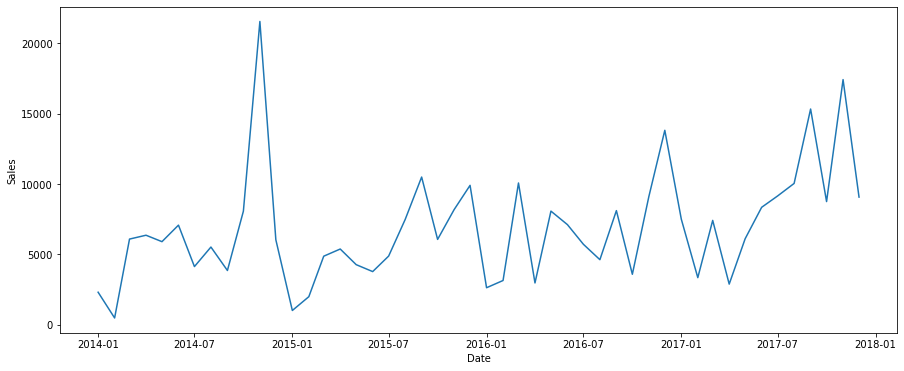

In [7]:
# plot basic graph
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(indexed_df['Sales'])

In [8]:
# need to calculate rolling statistics
rolling_mean = df.rolling(window=3).mean()
rolling_std = df.rolling(window=3).std()
print(rolling_mean.head(), rolling_std.head())

                  Sales
Order_Date             
2014-01-01          NaN
2014-02-01          NaN
2014-03-01  2963.500667
2014-04-01  4312.192667
2014-05-01  6117.838000                   Sales
Order_Date             
2014-01-01          NaN
2014-02-01          NaN
2014-03-01  2855.730985
2014-04-01  3315.093549
2014-05-01   230.007368


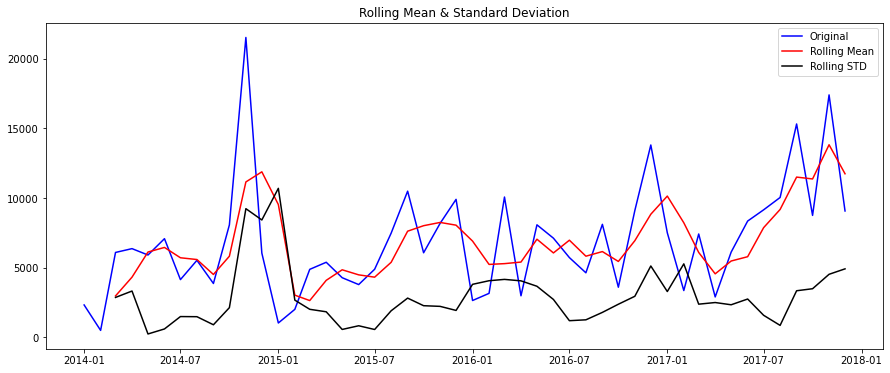

In [9]:
original = plt.plot(df, color='blue', label='Original')
r_mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
r_std = plt.plot(rolling_std, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [26]:
# dickey-fuller test to see if timeseries is stationary 

print('Dickey-Fuller Test Results:')
dftest = adfuller(indexed_df['Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', '#Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test Results:
Test Statistics        -5.327947
p-value                 0.000005
#Lags Used              0.000000
#Observations Used     47.000000
Critical Value(1%)     -3.577848
Critical Value(5%)     -2.925338
Critical Value(10%)    -2.600774
dtype: float64


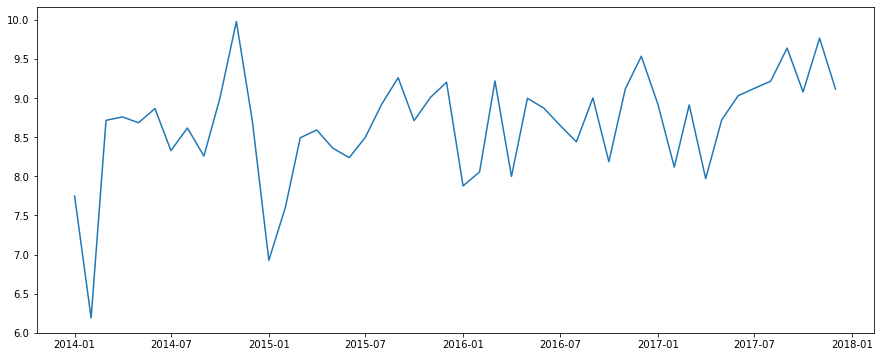

In [11]:
# Estimating Trend
indexed_df_logScale = np.log(indexed_df)
plt.plot(indexed_df_logScale)

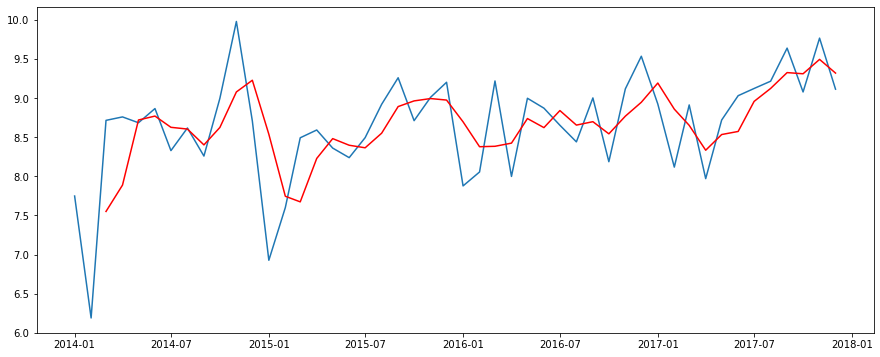

In [28]:
# calculate moving average
movingAVG = indexed_df_logScale.rolling(window=3).mean()
movingSTD = indexed_df_logScale.rolling(window=3).std()
plt.plot(indexed_df_logScale)
plt.plot(movingAVG, color='red')


In [13]:
# need to get difference between moving average and actual sales
dfLogScaleMinusMovingAverage = indexed_df_logScale - movingAVG


# remove NaN values
dfLogScaleMinusMovingAverage.dropna(inplace=True)
dfLogScaleMinusMovingAverage.head()

,Sales
Order_Date,
2014-03-01,1.163781
2014-04-01,0.870898
2014-05-01,-0.035032
2014-06-01,0.095926
2014-07-01,-0.297796


In [43]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
   # get rolling stats
    movingAverage = timeseries.rolling(window=3).mean()
    movingSTD = timeseries.rolling(window=3).std()
    
    # plot rolling stats
    original = plt.plot(timeseries, color='Blue', label='Original')
    moveAVG = plt.plot(movingAverage, color='red', label='Rolling Average')
    moveSTD = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #print results of dickey fuller test
    print('Dickey-Fuller Test Results:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', '#Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)

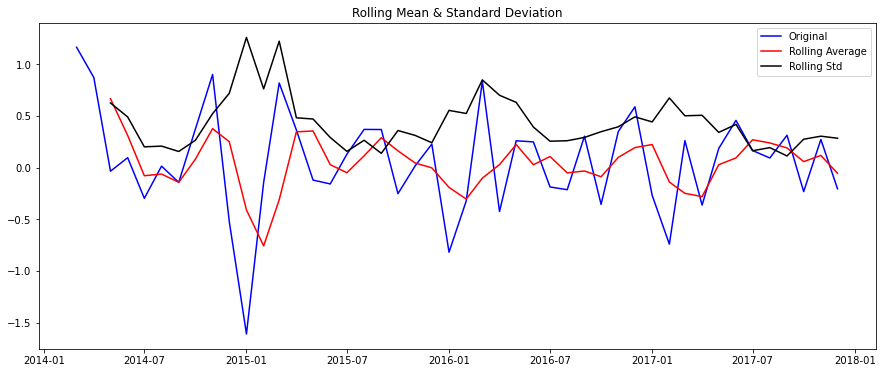

Dickey-Fuller Test Results:
Test Statistics        -4.739068
p-value                 0.000071
#Lags Used             10.000000
#Observations Used     35.000000
Critical Value(1%)     -3.632743
Critical Value(5%)     -2.948510
Critical Value(10%)    -2.613017
dtype: float64


In [45]:
test_stationary(dfLogScaleMinusMovingAverage)

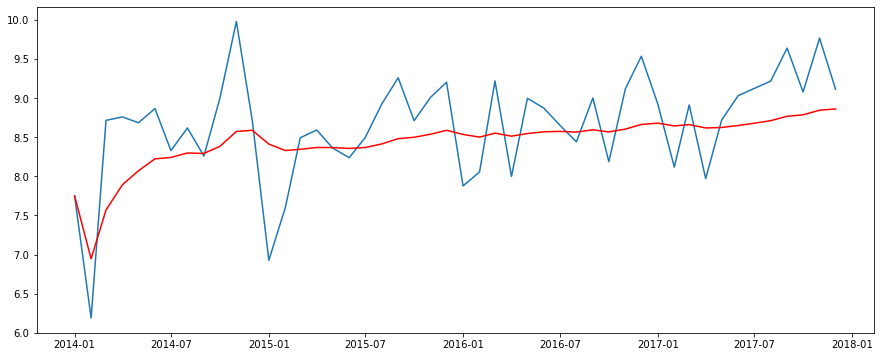

In [46]:
exponentialDecayWeightAverage = indexed_df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexed_df_logScale)
plt.plot(exponentialDecayWeightAverage, color='red')

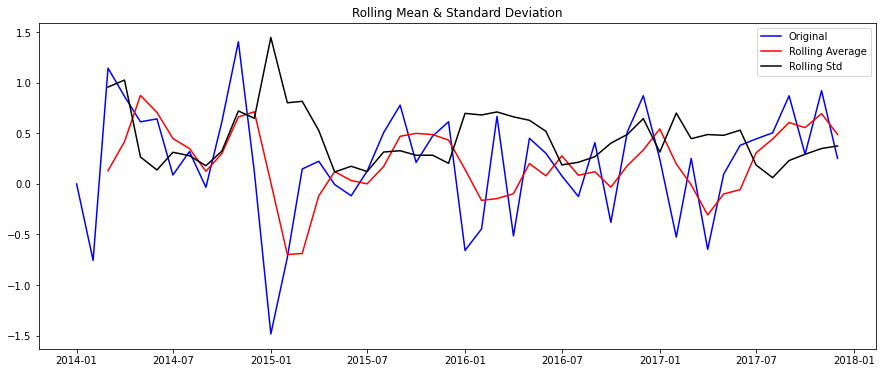

Dickey-Fuller Test Results:
Test Statistics        -3.603076
p-value                 0.005702
#Lags Used              9.000000
#Observations Used     38.000000
Critical Value(1%)     -3.615509
Critical Value(5%)     -2.941262
Critical Value(10%)    -2.609200
dtype: float64


In [47]:
dfLogScaleMinusMovingExponentialDecayAvg = indexed_df_logScale - exponentialDecayWeightAverage
test_stationary(dfLogScaleMinusMovingExponentialDecayAvg)

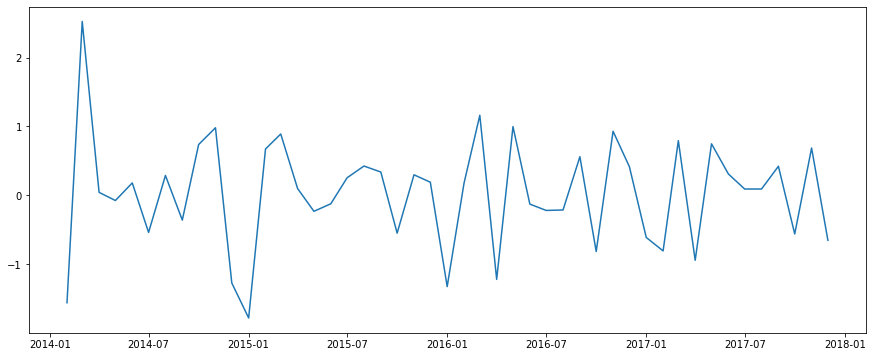

In [48]:
dfLogDiffShifting = indexed_df_logScale - indexed_df_logScale.shift()
plt.plot(dfLogDiffShifting)

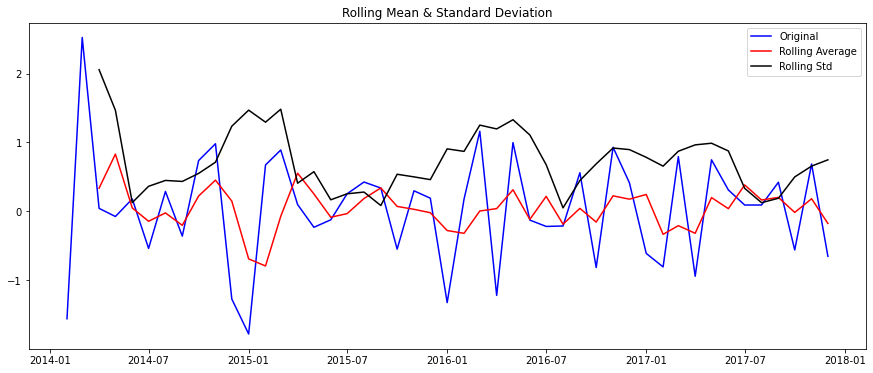

Dickey-Fuller Test Results:
Test Statistics        -4.989883
p-value                 0.000023
#Lags Used             10.000000
#Observations Used     36.000000
Critical Value(1%)     -3.626652
Critical Value(5%)     -2.945951
Critical Value(10%)    -2.611671
dtype: float64


In [19]:
dfLogDiffShifting.dropna(inplace=True)
test_stationary(dfLogDiffShifting)

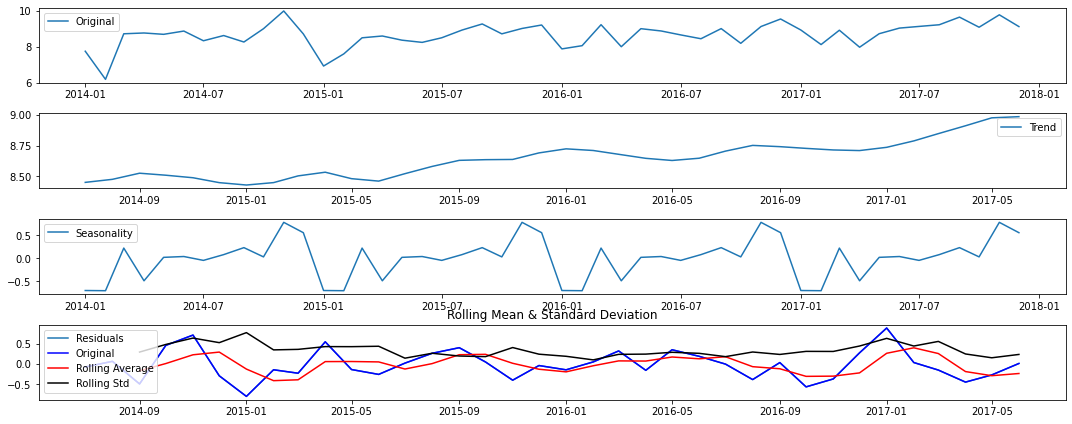

Dickey-Fuller Test Results:
Test Statistics        -5.300488
p-value                 0.000005
#Lags Used              2.000000
#Observations Used     33.000000
Critical Value(1%)     -3.646135
Critical Value(5%)     -2.954127
Critical Value(10%)    -2.615968
dtype: float64


In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed_df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexed_df_logScale, label='Original' )
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

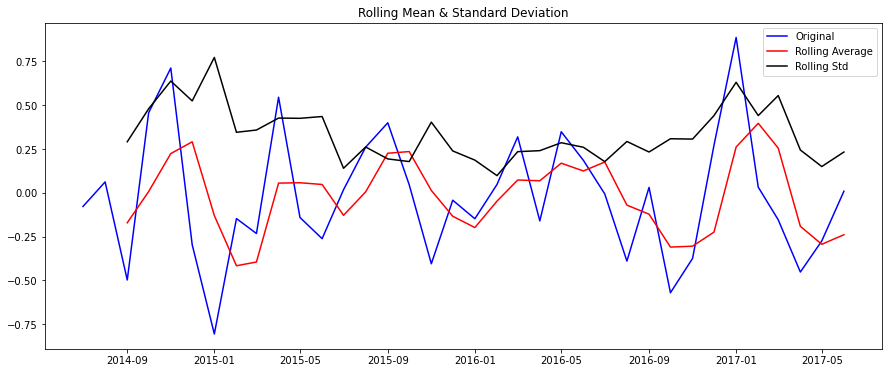

Dickey-Fuller Test Results:
Test Statistics        -5.300488
p-value                 0.000005
#Lags Used              2.000000
#Observations Used     33.000000
Critical Value(1%)     -3.646135
Critical Value(5%)     -2.954127
Critical Value(10%)    -2.615968
dtype: float64


In [52]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

C:\Users\gmwin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


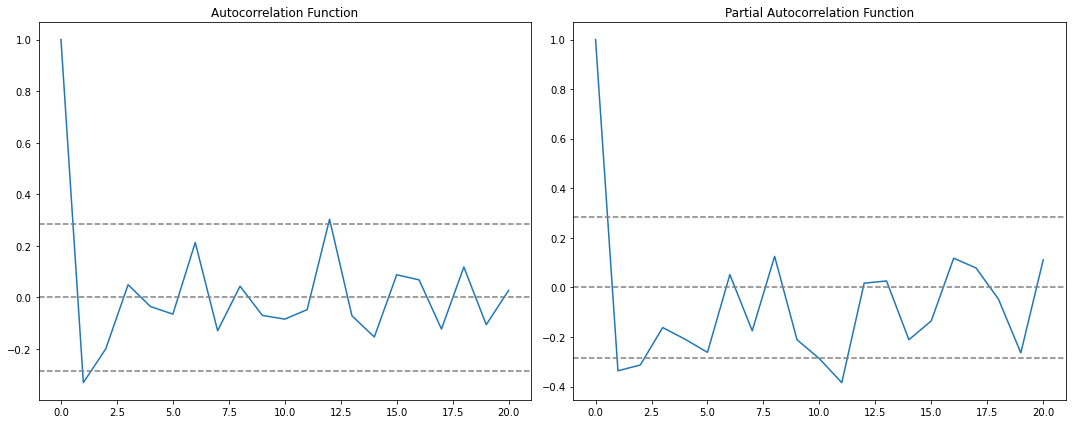

In [58]:
from statsmodels.tsa.stattools import acf, pacf
dfLogDiffShifting.dropna(inplace=True)
lag_acf = acf(dfLogDiffShifting, nlags=20)
lag_pacf = pacf(dfLogDiffShifting, nlags=20, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--',color='grey')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(dfLogDiffShifting)), linestyle='--',color='grey')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

C:\Users\gmwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gmwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR Model


C:\Users\gmwin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


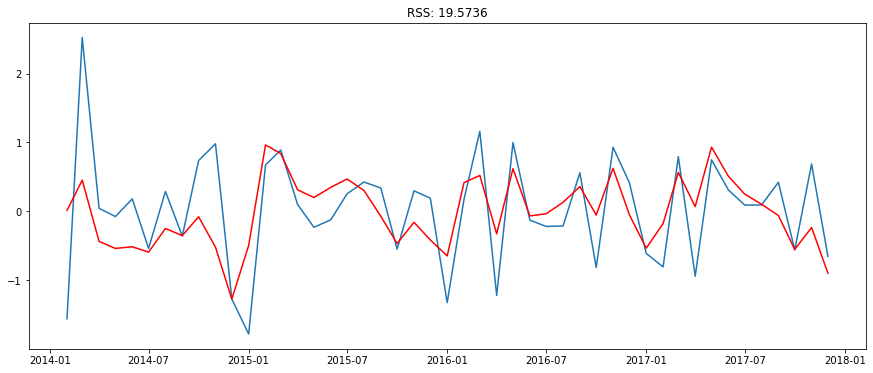

In [80]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model
model = ARIMA(indexed_df_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dfLogDiffShifting['Sales'])**2))
print('Plotting AR Model')


Plottong AR Model


C:\Users\gmwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gmwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


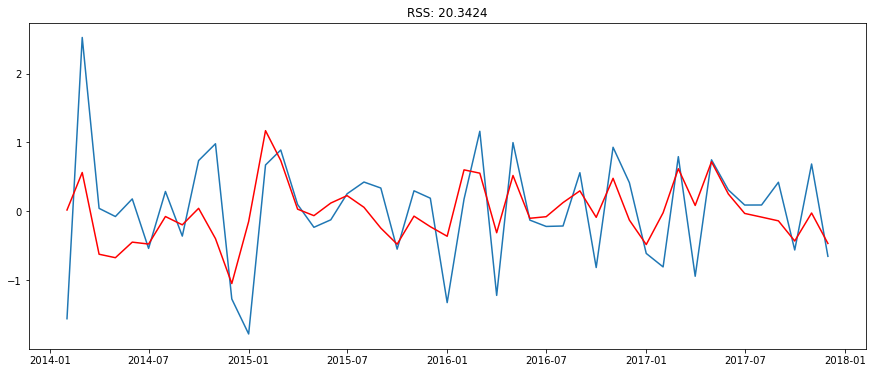

In [92]:
# MA Model
model = ARIMA(indexed_df_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - dfLogDiffShifting['Sales'])**2))
print('Plottong AR Model')

C:\Users\gmwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gmwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gmwin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Text(0.5, 1.0, 'RSS: 19.5736')

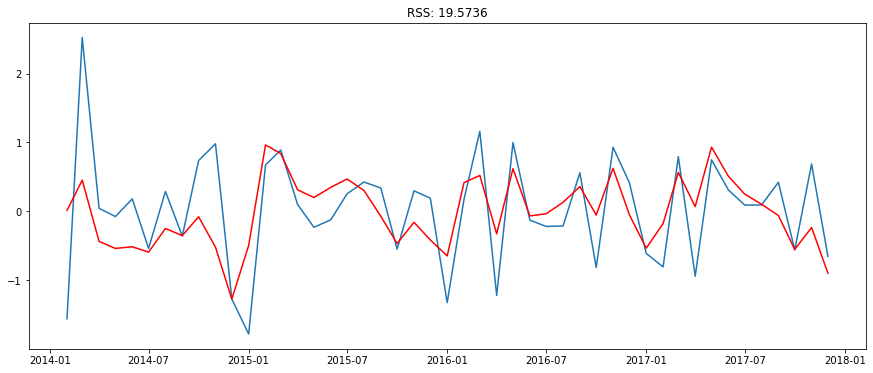

In [93]:
model = ARIMA(indexed_df_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - dfLogDiffShifting['Sales'])**2))

In [94]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Order_Date
2014-02-01    0.014632
2014-03-01    0.453760
2014-04-01   -0.436176
2014-05-01   -0.537506
2014-06-01   -0.513373
dtype: float64


In [95]:
# conver to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Order_Date
2014-02-01    0.014632
2014-03-01    0.468392
2014-04-01    0.032216
2014-05-01   -0.505289
2014-06-01   -1.018663
dtype: float64


In [99]:
predictions_ARIMA_log = pd.Series(indexed_df_logScale['Sales'], index=indexed_df_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Order_Date
2014-01-01    7.747338
2014-02-01    6.203963
2014-03-01    9.182398
2014-04-01    8.790232
2014-05-01    8.178173
dtype: float64

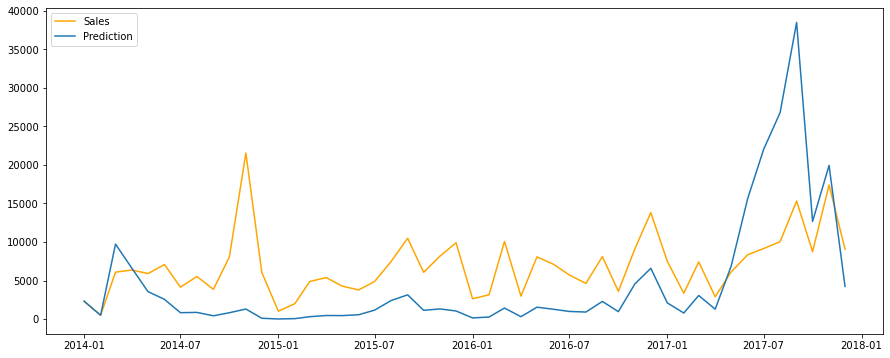

In [114]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexed_df['Sales'], color='orange',label='Sales')
plt.plot(predictions_ARIMA, label='Prediction')
plt.legend()

In [108]:
indexed_df_logScale.shape

(48, 1)

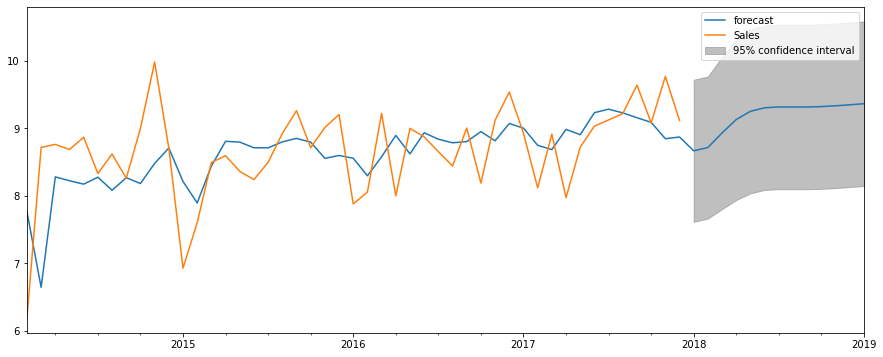

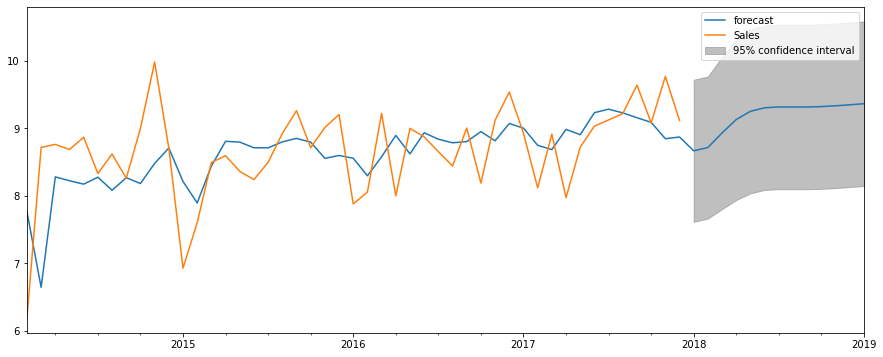

In [119]:
results_ARIMA.plot_predict(1,60)
#x=results_ARIMA.forecast(steps=12)

In [116]:
x[1]

array([0.53668279, 0.53681863, 0.57514242, 0.60801145, 0.61929937,
       0.62081936, 0.62081943, 0.62102636, 0.62122097, 0.62129161,
       0.62130153, 0.62130153])

In [117]:
len(x[1])

12

In [118]:
np.exp(x[1])

array([1.71032395, 1.71055629, 1.77738364, 1.83677525, 1.85762608,
       1.8604518 , 1.86045193, 1.86083696, 1.86119912, 1.86133061,
       1.86134907, 1.86134907])